In [30]:
# Classic imports
import random
import os

from data_processing import csv_data_processing
from pandas.plotting import scatter_matrix
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Parameters for algorithm
n_iter = 10             # iterations for algorithm to stop (additional stop variable)
k = 3                   # cluster number
standard = True         # standard scaling of data

In [31]:
# Data Processing with dedicated class (simple load with changing text/nonnumerical values to classes)
cdp = csv_data_processing()
database = cdp.process_data('clustering.csv')

# This is a place for processing database (in this we work on three features)
database_drop = database.drop(columns='Loan_ID').astype(float)
database = database[['ApplicantIncome', 'LoanAmount']].copy()

# Deleting and storing the features names
if os.path.isdir(os.path.join(os.getcwd(), Path('exp_data'))) is False: os.mkdir('exp_data')
features = database.columns

# Saving them to txt and removing columns headers
with open('exp_data/features.txt', 'w') as f:
    for index, feats in enumerate(features): f.write(str(index) + ": " + str(feats) + "\n")

database = database.set_axis(list(range(0,len(features),1)), axis='columns')

print("Processed database:")
print(database)


Processed database:
        0      1
0    4583  128.0
1    3000   66.0
2    2583  120.0
3    6000  141.0
4    2333   95.0
..    ...    ...
376  5703  128.0
377  3232  108.0
378  2900   71.0
379  4106   40.0
380  4583  133.0

[381 rows x 2 columns]


0: ApplicantIncome
1: LoanAmount



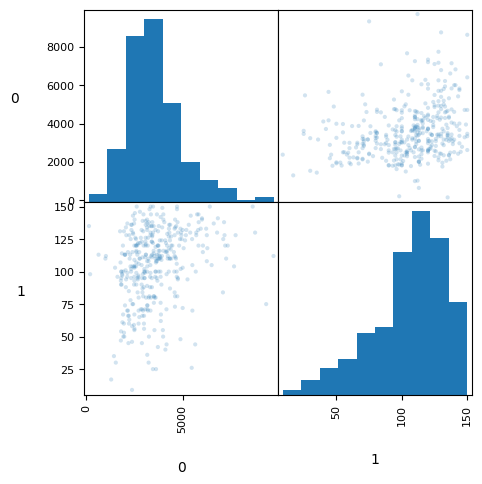

In [32]:
# Desciribing features with scatter matrix
with open('exp_data/features.txt', 'r') as f:
    print(f.read())

fig_scatter = scatter_matrix(database, alpha=0.2, figsize=(5,5), diagonal='hist')
for ax in fig_scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), labelpad=20)
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right', labelpad=20)

In [33]:
# Standard scaling of data
if standard is True:
    data=[]
    for column in database:
        col=[]
        for iter, item in enumerate(database[column]):
            col.append((item-np.mean(database[column]))/np.std(database[column]))
        data.append(col)

    database=pd.DataFrame(np.transpose(data))
    print(database)

            0         1
0    0.707469  0.812575
1   -0.408932 -1.376596
2   -0.703019  0.530102
3    1.706799  1.271595
4   -0.879330 -0.352629
..        ...       ...
376  1.497342  0.812575
377 -0.245316  0.106391
378 -0.479457 -1.200050
379  0.371067 -2.294635
380  0.707469  0.989121

[381 rows x 2 columns]


In [34]:
# Picking random points for start of clustering
centroids = []
inertia_iter = []
for centers in range (0, k): centroids.append(database.loc[random.randint(0, database.shape[0])])

print(centroids)

[0   -0.465352
1   -0.635102
Name: 273, dtype: float64, 0   -0.691030
1    0.071082
Name: 314, dtype: float64, 0   -2.418877
1    1.059740
Name: 132, dtype: float64]


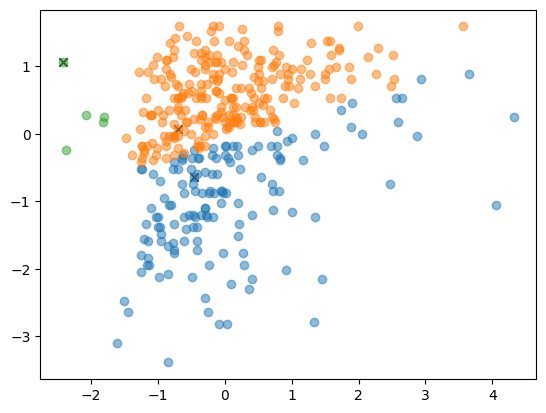

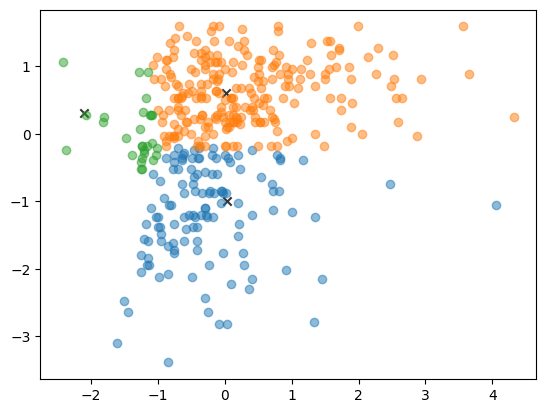

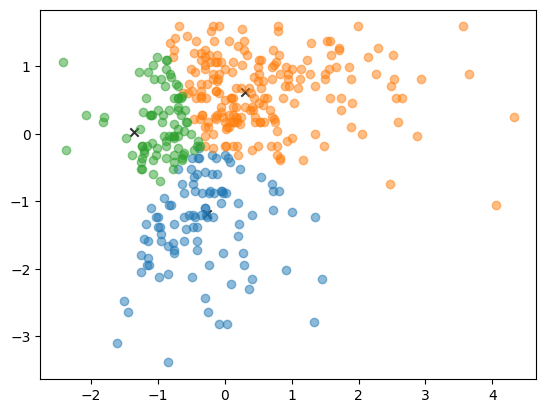

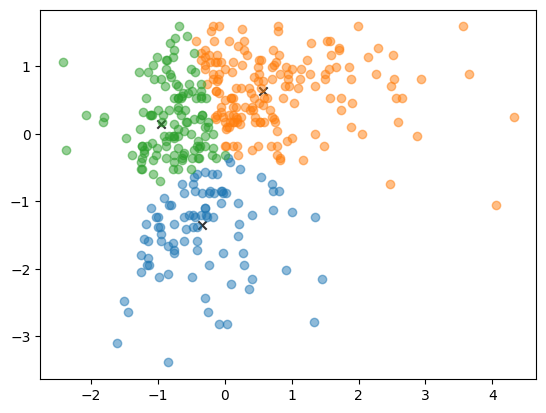

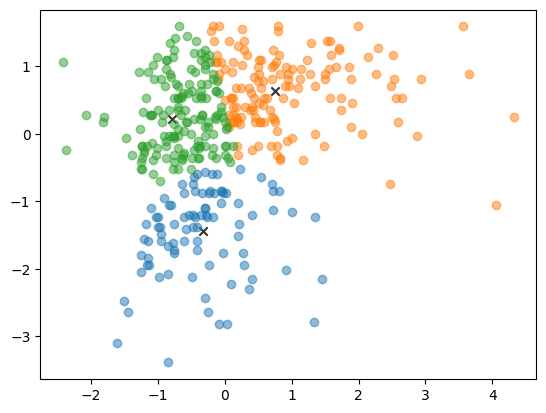

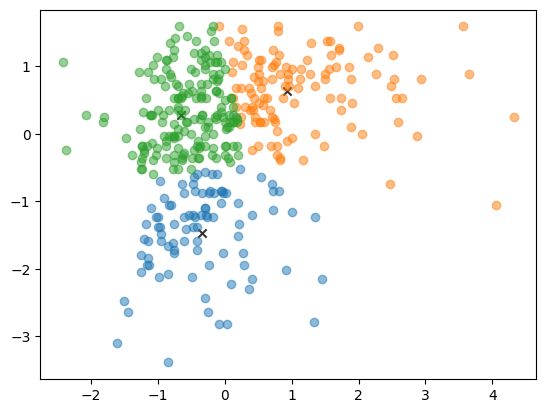

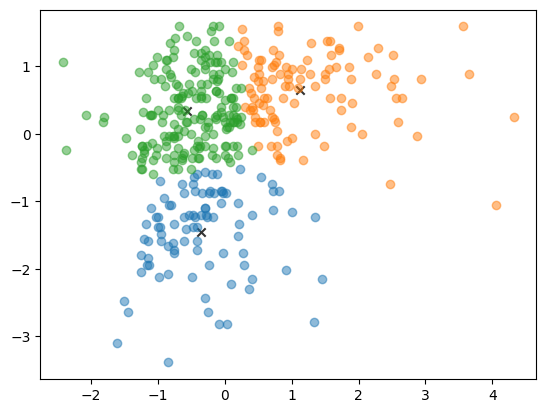

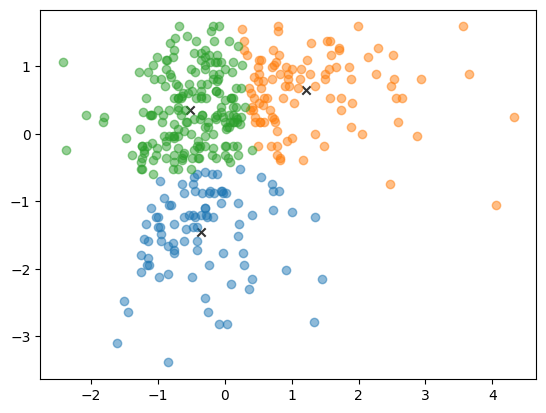

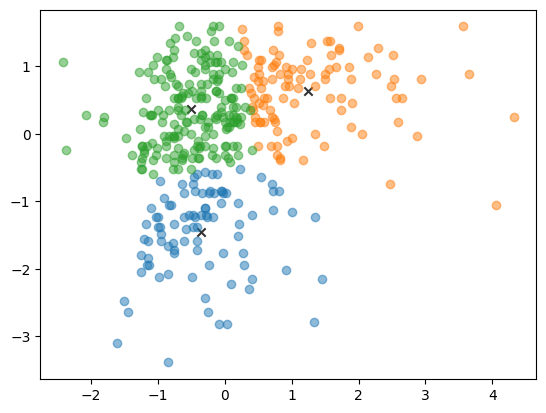

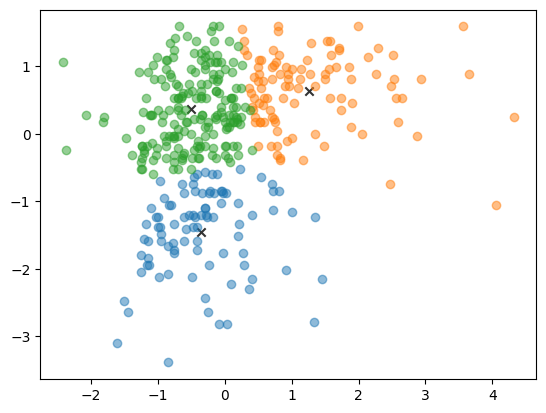

In [35]:
# Calculating distance from centroids
for iter in range(0, n_iter):
    distance = []
    for centers in centroids:
        sum = 0
        for idx, cordinate in enumerate(centers): sum += (database[idx] - cordinate)**2
        distance.append(np.sqrt(sum))

    distance = pd.DataFrame(np.transpose(distance))

    # Clustering data
    labels = []
    for row in distance.iloc:
        labels.append(row[row==np.min(row)].index.values[0])
        
    distance['labels'] = labels
    del(labels)

    clusters=[]
    for label in range(0, k):
        clusters.append(database[distance["labels"]==label])

    if database.shape[1] == 2:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot()

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], marker='o', alpha=0.5)


    if database.shape[1] == 3:
        fig_cluster = plt.figure()
        ax_cluster = fig_cluster.add_subplot(projection='3d')

        for centers in centroids: ax_cluster.scatter(centers[0], centers[1], centers[2], marker='x', c='black', alpha=0.8)
        for group in clusters: ax_cluster.scatter(group[0], group[1], group[2], marker='o', alpha=0.5)

    centroids=[]
    for center in range(0, k): centroids.append(np.mean(database[distance['labels']==center], axis=0))

    inertia = 0
    for label in range(0, k):
        inertia += np.sum(distance[distance['labels']==label][label])
    inertia_iter.append(inertia)

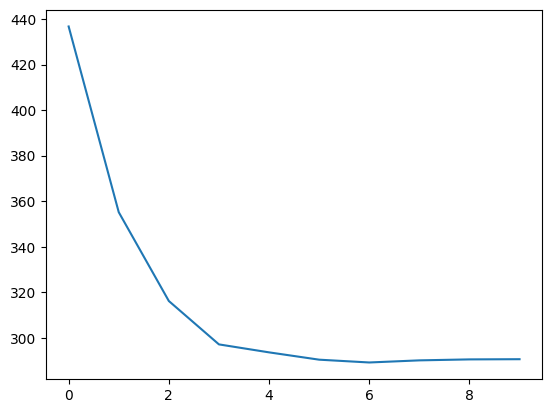

In [36]:
fig_inertia=plt.figure()
ax_inertia=fig_inertia.add_subplot()
ax_inertia.plot(inertia_iter)